In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv('./data/kickstarter.csv')
data.shape

(1163, 20)

## Prepare Data
* Perform EDA
* Handle Missing Data (Remove or Impute)
* Identify Target Data
* Scale the Data
* Encode any Text Data (Categorical Data)

In [3]:
data.head()

,Funded,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,no,https://www.kickstarter.com/projects/mischaa/p...,Pixelstart: Choose Your Own Pixels (Canceled),2016,Apr,Art,1,11,2,125,57,2829.59,53,7,1.14,171.0,2001,2,1,1
1,no,https://www.kickstarter.com/projects/105587445...,Smart shop Icons (Canceled),2016,Apr,Art,1,0,0,111,27,28295.87,51,3,1.14,46.0,2508,0,0,0
2,no,https://www.kickstarter.com/projects/minimalpr...,Minimal Haus Prints: Digital Prints for DIY Wa...,2016,Apr,Art,0,4,0,294,52,766.25,30,8,1.51,755.0,2325,1,1,1
3,no,https://www.kickstarter.com/projects/797661619...,NeoN: Altering the Alternative (Canceled),2016,Mar,Art,0,0,0,179,41,1439.10,24,5,7.00,141.0,3736,13,1,1
4,no,https://www.kickstarter.com/projects/198369359...,Nintendo NES 8bit retro canvas (Canceled),2016,Mar,Art,0,0,0,51,41,1000.00,30,2,5.00,20.0,636,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Funded             1163 non-null   object 
 1   URL                1163 non-null   object 
 2   Title              1163 non-null   object 
 3   Year               1163 non-null   int64  
 4   Month              1163 non-null   object 
 5   Type               1163 non-null   object 
 6   Has FB             1163 non-null   int64  
 7   Backed Projects    1163 non-null   int64  
 8   Previous Projects  1163 non-null   int64  
 9   Creator Desc Len   1163 non-null   int64  
 10  Title Len          1163 non-null   int64  
 11  Goal               1163 non-null   float64
 12  Duration           1163 non-null   int64  
 13  Pledge Levels      1163 non-null   int64  
 14  Min Pledge Tiers   1163 non-null   float64
 15  Max Pledge Tiers   1163 non-null   float64
 16  Proj Desc Len      1163 

In [5]:
data.isnull().sum()

Funded               0
URL                  0
Title                0
Year                 0
Month                0
Type                 0
Has FB               0
Backed Projects      0
Previous Projects    0
Creator Desc Len     0
Title Len            0
Goal                 0
Duration             0
Pledge Levels        0
Min Pledge Tiers     0
Max Pledge Tiers     0
Proj Desc Len        0
Images               0
Videos               0
Has Video            0
dtype: int64

In [6]:
data['Funded'].value_counts()

Funded
no     685
yes    478
Name: count, dtype: int64

In [7]:
data.columns

Index(['Funded', 'URL', 'Title', 'Year', 'Month', 'Type', 'Has FB',
       'Backed Projects', 'Previous Projects', 'Creator Desc Len', 'Title Len',
       'Goal', 'Duration', 'Pledge Levels', 'Min Pledge Tiers',
       'Max Pledge Tiers', 'Proj Desc Len', 'Images', 'Videos', 'Has Video'],
      dtype='object')

In [8]:
# PERFORM ANY RENAMES...       we rename by copying columns and saving them back
#df.columns = [' ',....]

In [9]:
#ProfileReport(data, title ='Kickstarter')

### Create a classifier:
* Using the kickstarter.csv file for train and test
* Using the unseen_data.csv below for a final test
* 'Funded' is the feature I will predict 
### Classifier Steps
1) Gather sample data for "unseen data"
    * a. create a train / test csv file
    * b. create a unseen data csv file
2) Pycaret EDA notebook 
    * a. identify the best (sklearn) model 
       * i. using the train / test csv from step 1
    * b. EDA
3) Lean Pycaret notebook:
    * create the model
    * export the pipline (i.e. finalize model)
4) Import using joblib
    * run against unseen data
    * test results

#### **1.**  First I set aside 20% of data sample to be used in the end against the trined and tested data and i save them each in .csv file

In [10]:
unseen_data = data.sample(frac=.20)   # set asides data.sample(frac=.30, random_state=42) , i decided for 20% 
df = data.drop(unseen_data.index)

In [11]:
# does my row count match
data.shape[0] == df.shape[0] + unseen_data.shape[0]

True

In [12]:
#unseen_data.to_csv('./data/unseen_data.csv')
#reset the index
unseen_data.to_csv('./data/unseen_data.csv', index=False)

In [13]:
#df.to_csv('./data/adult_census.csv')
#reset index
df.to_csv('./data/Kickstarter0.8.csv', index=False)

In [14]:
df.describe().T   

,count,mean,std,min,25%,50%,75%,max
Year,930.0,2016.000000,0.000000,2016.00,2016.00,2016.0,2016.00,2016.0
Has FB,930.0,0.519355,0.499894,0.00,0.00,1.0,1.00,1.0
Backed Projects,930.0,4.423656,16.864466,0.00,0.00,0.0,2.00,348.0
Previous Projects,930.0,0.859140,2.509947,0.00,0.00,0.0,0.00,29.0
Creator Desc Len,930.0,356.845161,168.750182,0.00,214.00,397.5,504.00,757.0
Title Len,930.0,37.007527,17.746782,1.00,21.00,37.0,53.00,82.0
Goal,930.0,43290.830538,347391.064713,10.00,2000.00,7000.0,25000.00,10000000.0
Duration,930.0,33.632258,11.493913,4.00,30.00,30.0,35.00,62.0
Pledge Levels,930.0,7.239785,5.926490,1.00,3.00,6.0,10.00,89.0
Min Pledge Tiers,930.0,43.094634,417.179628,0.70,1.12,5.0,14.00,10000.0


In [15]:
df.columns

Index(['Funded', 'URL', 'Title', 'Year', 'Month', 'Type', 'Has FB',
       'Backed Projects', 'Previous Projects', 'Creator Desc Len', 'Title Len',
       'Goal', 'Duration', 'Pledge Levels', 'Min Pledge Tiers',
       'Max Pledge Tiers', 'Proj Desc Len', 'Images', 'Videos', 'Has Video'],
      dtype='object')

#### **2.** Second, we import Classification Experiment and/or classification models and set up the Target + select best model

In [16]:
#pip install --upgrade joblib
# !pip install joblib==1.3.0

In [17]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()

In [18]:
s.setup(data, target = 'Funded', session_id = 42)       #quickstart has 123, we do 42

,Description,Value
0,Session id,42
1,Target,Funded
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(1163, 20)"
5,Transformed data shape,"(1163, 29)"
6,Transformed train set shape,"(814, 29)"
7,Transformed test set shape,"(349, 29)"
8,Numeric features,15
9,Categorical features,4


In [19]:
%%time
best = s.compare_models()  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7801,0.0000,0.7801,0.7794,0.7776,0.5381,0.5413,0.6330
ridge,Ridge Classifier,0.7298,0.0000,0.7298,0.7879,0.6953,0.3882,0.4654,0.0210
svm,SVM - Linear Kernel,0.6671,0.0000,0.6671,0.7161,0.6591,0.3409,0.3741,0.0170
knn,K Neighbors Classifier,0.6525,0.0000,0.6525,0.6498,0.6477,0.2709,0.2739,0.3580
et,Extra Trees Classifier,0.5897,0.0000,0.5897,0.4291,0.4409,0.0045,0.0172,0.0340
dt,Decision Tree Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0180
rf,Random Forest Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0410
qda,Quadratic Discriminant Analysis,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0170
ada,Ada Boost Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0180
gbc,Gradient Boosting Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0280


CPU times: total: 4.17 s
Wall time: 20.4 s


In [20]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [21]:
from pycaret.classification import setup, models, create_model, tune_model, finalize_model, save_model

cls = setup(data, target='Funded', session_id=42, fix_imbalance=True);

,Description,Value
0,Session id,42
1,Target,Funded
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(1163, 20)"
5,Transformed data shape,"(1307, 29)"
6,Transformed train set shape,"(958, 29)"
7,Transformed test set shape,"(349, 29)"
8,Numeric features,15
9,Categorical features,4


#### **3.** Third, we create, tune and finalize the model and export the .pkl file

In [22]:
lr = s.create_model('lr')
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7805,0.0000,0.7805,0.7794,0.7780,0.5399,0.5427
1,0.8049,0.0000,0.8049,0.8045,0.8027,0.5910,0.5941
2,0.7927,0.0000,0.7927,0.7920,0.7922,0.5711,0.5713
3,0.7561,0.0000,0.7561,0.7543,0.7534,0.4888,0.4914
4,0.7284,0.0000,0.7284,0.7264,0.7269,0.4321,0.4327
5,0.7778,0.0000,0.7778,0.7763,0.7766,0.5354,0.5361
6,0.7901,0.0000,0.7901,0.7924,0.7848,0.5504,0.5601
7,0.8272,0.0000,0.8272,0.8263,0.8262,0.6386,0.6395
8,0.7654,0.0000,0.7654,0.7659,0.7595,0.4976,0.5063


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr = cls.create_model('lr')
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7927,0.0000,0.7927,0.8014,0.7941,0.5819,0.5863
1,0.8049,0.0000,0.8049,0.8045,0.8027,0.5910,0.5941
2,0.7561,0.0000,0.7561,0.7626,0.7576,0.5060,0.5085
3,0.7439,0.0000,0.7439,0.7451,0.7444,0.4747,0.4748
4,0.7407,0.0000,0.7407,0.7421,0.7413,0.4656,0.4657
5,0.7284,0.0000,0.7284,0.7548,0.7305,0.4629,0.4774
6,0.7778,0.0000,0.7778,0.7778,0.7778,0.5398,0.5398
7,0.8148,0.0000,0.8148,0.8191,0.8159,0.6218,0.6236
8,0.8395,0.0000,0.8395,0.8436,0.8404,0.6723,0.6742


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
tune_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8049,0.0000,0.8049,0.8111,0.8061,0.6048,0.6078
1,0.8049,0.0000,0.8049,0.8045,0.8027,0.5910,0.5941
2,0.7805,0.0000,0.7805,0.7868,0.7818,0.5554,0.5582
3,0.7439,0.0000,0.7439,0.7451,0.7444,0.4747,0.4748
4,0.7284,0.0000,0.7284,0.7315,0.7295,0.4428,0.4433
5,0.7407,0.0000,0.7407,0.7633,0.7429,0.4850,0.4973
6,0.7778,0.0000,0.7778,0.7805,0.7787,0.5441,0.5448
7,0.8272,0.0000,0.8272,0.8296,0.8279,0.6454,0.6462
8,0.8642,0.0000,0.8642,0.8729,0.8652,0.7253,0.7310


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
final_lr = finalize_model(tune_lr)
final_lr

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Year', 'Has FB',
                                             'Backed Projects',
                                             'Previous Projects',
                                             'Creator Desc Len', 'Title Len',
                                             'Goal', 'Duration',
                                             'Pledge Levels',
                                             'Min Pledge Tiers',
                                             'Max Pledge T...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LogisticRegression(C=8.426, class_weight='balanced',
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1000, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

We will save and use this  ***'final_lr'*** to predict the unseen data that will be imported below.

In [26]:
save_model(final_lr, './models/lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Year', 'Has FB',
                                              'Backed Projects',
                                              'Previous Projects',
                                              'Creator Desc Len', 'Title Len',
                                              'Goal', 'Duration',
                                              'Pledge Levels',
                                              'Min Pledge Tiers',
                                              'Max Pledge T...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\

#### **4.** Forth, we run the test against *unseen_data* and report on predictions and scores

In [27]:
unseen = pd.read_csv('./data/unseen_data.csv')
unseen.tail(3)

,Funded,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
230,yes,https://www.kickstarter.com/projects/121197046...,PC594: The Art of Rebellion,2016,Mar,Video,1,14,3,503,27,30000.00,35,21,1.00,9900.0,4097,3,1,1
231,yes,https://www.kickstarter.com/projects/designsta...,Pinkus - The Best friend for your Stylus,2016,Mar,Design,0,3,2,250,40,719.55,40,31,1.39,55.0,2833,25,3,1
232,yes,https://www.kickstarter.com/projects/wallgers/...,Vbag 5-in-1 Convertible Backpack System: One B...,2016,Mar,Design,0,4,0,135,60,8000.00,30,14,5.00,3800.0,6088,25,1,1


In [28]:
unseen.shape

(233, 20)

In [29]:
import joblib
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

test = pd.read_csv('./data/unseen_data.csv')
test.shape

(233, 20)

In [30]:
cls = joblib.load('./models/lr_model.pkl')

In [31]:
### Test against the Unseen ###
unseen_X = test.drop('Funded', axis=1)
y = test['Funded']

In [32]:
y_pred = cls.predict(unseen_X)

In [33]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          no       0.83      0.81      0.82       129
         yes       0.77      0.79      0.78       104

    accuracy                           0.80       233
   macro avg       0.80      0.80      0.80       233
weighted avg       0.80      0.80      0.80       233



In [ ]:
### to be able to encode the classification report we can import get_metrics() 

In [35]:
from pycaret.classification import *

In [36]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x0000021450F428E0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method='pr...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x0000021450F42...,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x0000021450F42...,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


1. **Accuracy**: This is the ratio of the number of correct predictions to the total number of predictions. It's used when the classes are balanced. It is calculated as:
    $$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

2. **AUC (Area Under the ROC Curve)**: This metric is used in binary classification. It measures the ability of the classifier to distinguish between classes. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 suggests a poor classifier.

3. **Recall (Sensitivity or True Positive Rate)**: This is the ratio of the number of true positives divided by the sum of the true positives and the false negatives. It shows how many of the positive samples have been identified correctly. It is calculated as:
    $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

4. **Precision (Positive Predictive Value)**: This is the ratio of the number of true positives divided by the sum of the true positives and the false positives. It shows how many of the positively classified samples are actually positive. It is calculated as:
    $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

5. **F1 Score**: This is the harmonic mean of Precision and Recall and tries to balance the two. It is calculated as:
    $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

6. **Kappa (Cohen's Kappa)**: This is used for multi-class classification. It measures the agreement between two raters who each classify items into mutually exclusive categories. A kappa of 1 indicates perfect agreement, while a kappa of 0 indicates agreement equivalent to chance.

7. **MCC (Matthews Correlation Coefficient)**: This is used in binary classification. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. It is calculated as:
    $$\text{MCC} = \frac{(\text{TP} \times \text{TN}) - (\text{FP} \times \text{FN})}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$
    where TP is True Positive, TN is True Negative, FP is False Positive, and FN is False Negative.

These metrics provide a comprehensive view of the performance of a classification model. Different metrics are suitable for different scenarios and it's important to choose the right metric for the right task. For example, in a highly imbalanced dataset, accuracy might not be a good metric to use, and one might resort to using F1 Score, Precision, Recall, or AUC-ROC instead. Similarly, MCC is a good metric when the classes are of very different sizes.

### BONUS 'TIP of a DAY'

#### Difference between predict. and predict.model()

a) .predict option

### FINDINGS

In [47]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
cls = final_lr
unseen_X = unseen.drop('Funded', axis=1)
y_true = unseen['Funded']

In [49]:
y_pred = cls.predict(unseen_X)       # in the settings it does say it returns array
# y_true, y_pred # once you have pred_y and true_y you can go straigh to scoring

In [50]:
unseen_X.shape, y_pred.shape

((233, 19), (233,))

In [53]:
report = classification_report(y_true, y_pred)   #Shitf+Tab will show what it will show
print(report)

              precision    recall  f1-score   support

          no       0.83      0.81      0.82       129
         yes       0.77      0.79      0.78       104

    accuracy                           0.80       233
   macro avg       0.80      0.80      0.80       233
weighted avg       0.80      0.80      0.80       233



#### ALWAYS STOP AND LOOK AT WHAT YOU GET: STRING, OBJECT ECT...

In [54]:
y_true.dtype, y_pred.dtype  , #(y_true[0])    # mine and Jumanas pred_y was dataframe, where Pats was object

(dtype('O'), dtype('O'))

In [55]:
type(y_true[0]), type (y_pred[0]) 

(str, str)

In [56]:
type(y_true.dtype), type(y_pred.dtype)      # Pat's are numpy arrays

(numpy.dtypes.ObjectDType, numpy.dtypes.ObjectDType)

# SCORES

In [57]:
accuracy_score(y_true, y_pred)

0.7982832618025751

In [58]:
precision_score(y_true, y_pred, pos_label='yes')

0.7663551401869159

In [59]:
recall_score(y_true, y_pred, pos_label='yes')

0.7884615384615384

In [60]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[104,  25],
       [ 22,  82]], dtype=int64)

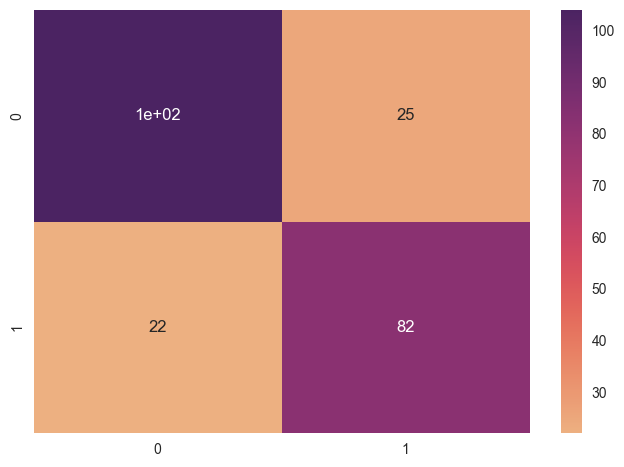

In [61]:
#import seaborn as sns
sns.heatmap(cm, annot=True, cmap='flare');

#### Functional API vs Object Oriented Programming (OOP) API

 With Object Oriented OOP we can run different experiments at same time, like in one we used balancing and on one didnt

### b.) predict_model() option

In [71]:
from pycaret.classification import ClassificationExperiment
cls_oop = ClassificationExperiment()      # it is not real set up , but just an experiment itself

In [72]:
cls_oop

In [73]:
cls_oop.predict_model(final_lr, unseen)       #because this brings back whole dataframe, put it into df

,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,...,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video,Funded,prediction_label,prediction_score
0,https://www.kickstarter.com/projects/878732893...,Fairy Tale's End Webseries,2016,Mar,Video,0,0,0,343,30,...,7,5.00,250.0,2114,0,1,1,yes,yes,0.5008
1,https://www.kickstarter.com/projects/garofaloe...,PatternsLibrary,2016,Feb,Software,0,0,0,241,15,...,7,10.00,10000.0,2609,1,0,0,no,no,0.8967
2,https://www.kickstarter.com/projects/892489289...,LiteStem,2016,Apr,Gadgets,0,0,0,479,8,...,2,5.00,25.0,1180,0,0,0,no,no,0.7024
3,https://www.kickstarter.com/projects/124554646...,KitRex Triceratops: A Fold-and-Play Cardboard ...,2016,Mar,Design,1,12,3,476,50,...,8,2.00,190.0,2343,13,1,1,yes,yes,0.7346
4,https://www.kickstarter.com/projects/577993044...,NoBowl Feeding System: A Brilliant Solution fo...,2016,Mar,Design,1,11,0,500,60,...,21,5.00,2000.0,9391,17,2,1,yes,yes,0.9709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,https://www.kickstarter.com/projects/117998916...,SANS Juice and Smoothie Preserving Travel Bottle,2016,Feb,Design,0,2,0,386,48,...,10,5.00,8000.0,2573,24,1,1,yes,yes,0.5651
229,https://www.kickstarter.com/projects/163230610...,GiftPrompt Mobile App,2016,Mar,Apps,0,0,0,248,21,...,1,25.00,25.0,2599,0,0,0,no,no,0.8121
230,https://www.kickstarter.com/projects/121197046...,PC594: The Art of Rebellion,2016,Mar,Video,1,14,3,503,27,...,21,1.00,9900.0,4097,3,1,1,yes,yes,0.8919
231,https://www.kickstarter.com/projects/designsta...,Pinkus - The Best friend for your Stylus,2016,Mar,Design,0,3,2,250,40,...,31,1.39,55.0,2833,25,3,1,yes,yes,0.9980


In [74]:
# this is like 1 hot ecoding, it is original data with actual = Feedback and the predictive label that is predicted actual and pred scores


In [75]:
df_oop = cls_oop.predict_model(final_lr, unseen) 

In [76]:
y_true = df_oop['Funded']
y_pred = df_oop['prediction_label']

In [77]:
#df_oop[df_oop['Feedback'] != df_oop['prediction_label']]   #look how the 99 had an 85% prediction score ti will be wirgh, but it still predicted wrong!

In [78]:
df_oop.sort_values(['prediction_score'])    #the whole enchilada


,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,...,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video,Funded,prediction_label,prediction_score
0,https://www.kickstarter.com/projects/878732893...,Fairy Tale's End Webseries,2016,Mar,Video,0,0,0,343,30,...,7,5.00,250.0,2114,0,1,1,yes,yes,0.5008
47,https://www.kickstarter.com/projects/213427645...,STICKY,2016,Mar,Video,0,2,0,516,6,...,6,36.00,1423.0,3015,0,1,1,yes,yes,0.5057
27,https://www.kickstarter.com/projects/153806133...,Re-ExperienceProject - (EP) ExperienceProject ...,2016,Apr,Software,0,0,0,511,53,...,3,2.00,200.0,2023,1,1,1,no,no,0.5091
21,https://www.kickstarter.com/projects/367723613...,Help Senior Students\xe2\x80\x99 Documentary P...,2016,Apr,Video,0,0,0,180,53,...,6,10.00,150.0,811,1,1,1,yes,yes,0.5091
148,https://www.kickstarter.com/projects/205955316...,LilPaws Pet Furniture,2016,Mar,Crafts,1,0,0,495,21,...,7,1.00,2500.0,4989,3,0,0,no,no,0.5097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,https://www.kickstarter.com/projects/176453150...,Metro Measure\tcentimeters\tfractions and back...,2016,Mar,Crafts,0,0,0,435,59,...,1,100.00,100.0,747,0,0,0,no,no,0.9976
231,https://www.kickstarter.com/projects/designsta...,Pinkus - The Best friend for your Stylus,2016,Mar,Design,0,3,2,250,40,...,31,1.39,55.0,2833,25,3,1,yes,yes,0.9980
25,https://www.kickstarter.com/projects/776968104...,Smart APP Search Engine,2016,Mar,Apps,0,0,0,320,23,...,1,35.00,35.0,3498,0,1,1,no,no,0.9995
139,https://www.kickstarter.com/projects/192023772...,Network of cameras to protect the rain-forest ...,2016,Feb,Gadgets,1,0,2,474,52,...,2,10.00,50.0,819,0,0,0,no,no,0.9995


In [79]:
type(y_true.dtype), type(y_pred.dtype), y_true.dtype, y_pred.dtype, type(y_true[0]), type (y_pred[0]) 

(pandas.core.dtypes.dtypes.CategoricalDtype,
 numpy.dtypes.ObjectDType,
 CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object),
 dtype('O'),
 str,
 str)

In [80]:
cls_oop      #it returns classification experiment

In [94]:
unseen['Funded']

0      yes
1       no
2       no
3      yes
4      yes
      ... 
228    yes
229     no
230    yes
231    yes
232    yes
Name: Funded, Length: 233, dtype: object

In [93]:
pred = cls_oop.predict_model(final_lr, data)
pred['actual_label'] = unseen['Funded']
pred['actual_label']

0       yes
1        no
2        no
3       yes
4       yes
       ... 
1158    NaN
1159    NaN
1160    NaN
1161    NaN
1162    NaN
Name: actual_label, Length: 1163, dtype: object

In [ ]:
acc = accuracy_score(pred['actual_label'], pred['prediction_label'])

In [ ]:
print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}')

Text(0.5, 1.0, 'Unseen Dataset Confusion Matrix')

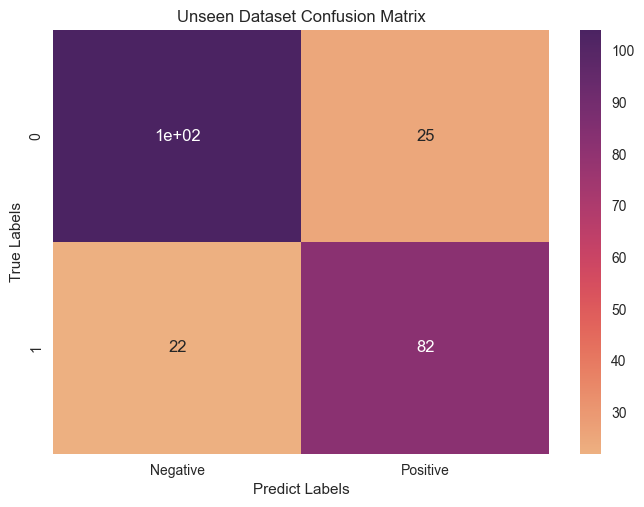

In [86]:
ax = sns.heatmap(cm, annot=True, cmap='flare')    #all this has to be in the same cell and we take control of my axis
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xticklabels(['Negative', 'Positive'])
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
plt.title('Unseen Dataset Confusion Matrix')

In [91]:
# the way to test the results
df = pd.DataFrame({'Pred':y_pred, 'True':y_true})
df

,Pred,True
0,yes,yes
1,no,no
2,no,no
3,yes,yes
4,yes,yes
...,...,...
228,yes,yes
229,no,no
230,yes,yes
231,yes,yes


In [89]:
diff = df[df['Pred'] != df['True']]
diff['Pred'].value_counts()

Pred
yes    25
no     22
Name: count, dtype: int64

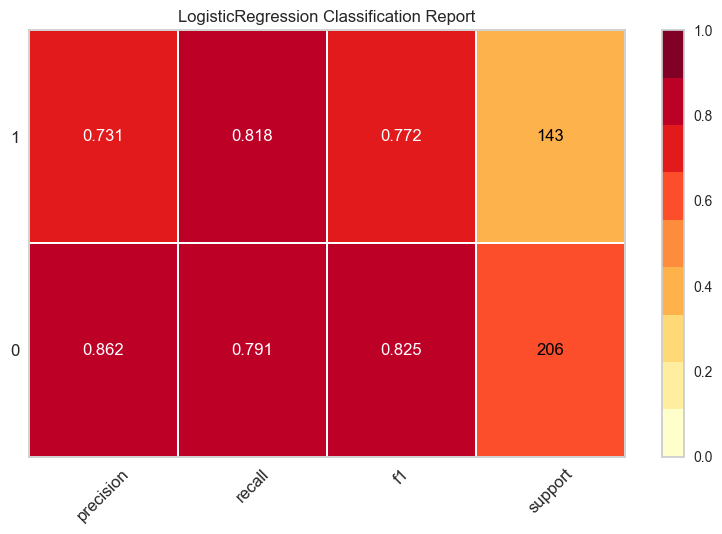

In [90]:
from pycaret.classification import *
plot_model(lr, plot = 'class_report')